In [1]:
#Import required Libraries
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model


In [2]:
 from google.colab import drive
 drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [3]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

In [5]:
#Load the Preprocessed Dataset
BS= 32
TS=(24,24)
train_batch= generator('/content/drive/My Drive/Drowsiness detection/dataset_new/train',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('/content/drive/My Drive/Drowsiness detection/dataset_new/test',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

Found 2517 images belonging to 2 classes.
Found 418 images belonging to 2 classes.
78 13


In [6]:
 #img,labels= next(train_batch)
 #print(img.shape)

(32, 24, 24, 1)


In [ ]:
#Build the Mode

In [7]:

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')#softmax sigmoid
])


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(
    #optimizer=RMSprop(learning_rate=LEARNING_RATE),
    #loss='binary_crossentropy',
   # metrics=['accuracy']



In [10]:
#Compile and Visualize the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [13]:
#Train the model
history=model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)# shuffle=True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
78/78 [==============================] - 22s 287ms/step - loss: 0.0517 - accuracy: 0.9811 - val_loss: 0.2184 - val_accuracy: 0.9135
Epoch 2/15
78/78 [==============================] - 22s 281ms/step - loss: 0.0304 - accuracy: 0.9895 - val_loss: 0.2662 - val_accuracy: 0.9279
Epoch 3/15
78/78 [==============================] - 22s 284ms/step - loss: 0.0281 - accuracy: 0.9907 - val_loss: 0.2567 - val_accuracy: 0.9279
Epoch 4/15
78/78 [==============================] - 22s 288ms/step - loss: 0.0278 - accuracy: 0.9899 - val_loss: 0.2842 - val_accuracy: 0.9207
Epoch 5/15
78/78 [==============================] - 23s 288ms/step - loss: 0.0239 - accuracy: 0.9907 - val_loss: 0.3052 - val_accuracy: 0.9135
Epoch 6/15
78/78 [==============================] - 22s 282ms/step - loss: 0.0237 - accuracy: 0.9936 - val_loss: 0.3201 - val_accuracy: 0.9087
Epoch 7/15
78/78 [==============================] - 22s 284ms/step - loss: 0.0213 - accuracy: 0.9907 - val_loss: 0.3169 - val_accuracy: 0.9159

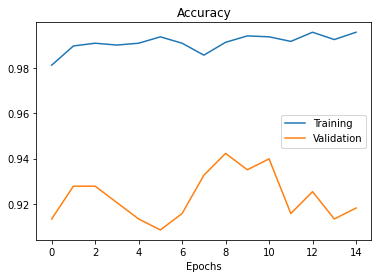

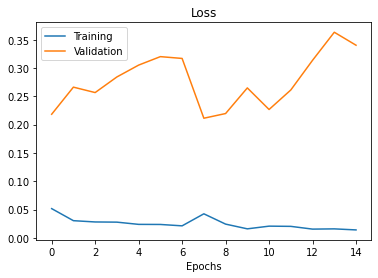

In [14]:
#Plot the Results
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.show()

In [15]:
predict_x=model.predict(valid_batch)
predict_x

array([[1.49116709e-11, 1.00000000e+00],
       [9.99999642e-01, 3.82029668e-07],
       [4.69740778e-01, 5.30259192e-01],
       [5.54736289e-06, 9.99994397e-01],
       [9.99800265e-01, 1.99712755e-04],
       [6.74157974e-08, 9.99999881e-01],
       [9.99969244e-01, 3.07567025e-05],
       [9.02383327e-01, 9.76167023e-02],
       [9.99987960e-01, 1.20732329e-05],
       [9.99826372e-01, 1.73616630e-04],
       [9.99999404e-01, 6.13197130e-07],
       [8.78131986e-01, 1.21867970e-01],
       [5.05208448e-02, 9.49479103e-01],
       [9.99953866e-01, 4.60913834e-05],
       [9.99332726e-01, 6.67294196e-04],
       [9.99568164e-01, 4.31851484e-04],
       [1.00000000e+00, 6.59721056e-10],
       [9.99954462e-01, 4.55039262e-05],
       [4.81482677e-17, 1.00000000e+00],
       [3.39080470e-05, 9.99966145e-01],
       [6.44363837e-17, 1.00000000e+00],
       [1.56350821e-01, 8.43649209e-01],
       [5.43807914e-08, 1.00000000e+00],
       [9.24166486e-08, 9.99999881e-01],
       [1.413941

In [ ]:
model.save('/content/drive/My Drive/Drowsiness detection/models/cnnN1.h5', overwrite=True)